
# Retail Sales Data Analysis

## Project Overview
This project analyzes retail sales data to uncover trends in revenue, customer behavior, and product performance.  
We explore top-selling categories, seasonal trends, and demographic purchasing patterns.

---

## Dataset Description
The dataset contains **transaction-level retail sales data** with the following columns:

| Column | Description |
|--------|-------------|
| Transaction_ID | Unique ID for each transaction |
| Date | Date of purchase |
| Customer_ID | Unique customer ID |
| Gender | Gender of the customer |
| Age | Customer age |
| Product_Category | Product category purchased |
| Quantity | Units purchased |
| Price_per_Unit | Price per unit in USD |
| Total_Amount | Total sale value (Quantity × Price_per_Unit) |


In [8]:

# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Styling
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Load Dataset
df = pd.read_csv(fr"C:\Users\prest\Coding\retail_sales_dataset.csv")

# Data Cleaning
df['Date'] = pd.to_datetime(df['Date'])
df.dropna(inplace=True)

# Validate Total_Amount
df['Check_Total'] = df['Quantity'] * df['Price_per_Unit']
mismatch_count = (df['Check_Total'] != df['Total_Amount']).sum()

print(f"Mismatched totals: {mismatch_count}")
df.drop(columns='Check_Total', inplace=True)


Mismatched totals: 0



## 1. Top-Selling Product Categories by Revenue

We first analyze which product categories contribute most to total revenue.


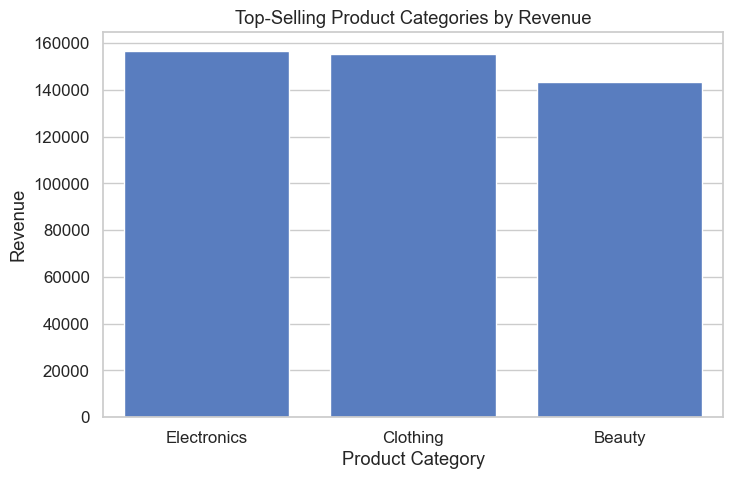

In [9]:

category_sales = df.groupby('Product_Category', as_index=False)['Total_Amount'].sum()
category_sales.sort_values(by='Total_Amount', ascending=False, inplace=True)

plt.figure(figsize=(8, 5))
sns.barplot(data=category_sales, x='Product_Category', y='Total_Amount')
plt.title("Top-Selling Product Categories by Revenue")
plt.ylabel("Revenue")
plt.xlabel("Product Category")
plt.show()



**Insight:**  
This chart highlights which categories dominate sales.  
Retailers can focus marketing and inventory investment on the highest-grossing categories.



## 2. Monthly Sales Trend

We examine revenue over time to identify seasonality and growth patterns.


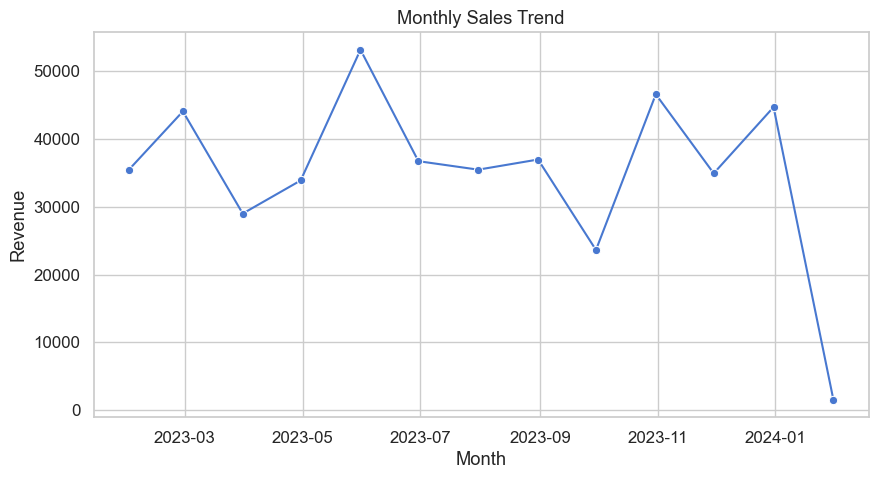

In [12]:

monthly_sales = df.resample('ME', on='Date')['Total_Amount'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Date', y='Total_Amount', marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.show()



**Insight:**  
Monthly revenue trends reveal seasonality and can help forecast future demand.



## 3. Average Order Value (AOV)

We calculate the mean value of a transaction.


In [13]:

aov = df['Total_Amount'].mean()
print(f"Average Order Value (AOV): ${aov:.2f}")


Average Order Value (AOV): $456.00



**Insight:**  
AOV is a key metric for tracking customer spending habits and setting upsell targets.



## 4. Revenue by Age Group

We bucket customers into age ranges and analyze spending patterns.


C:\Users\prest\AppData\Local\Temp\ipykernel_10708\140755976.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('Age_Group')['Total_Amount'].sum().reset_index()


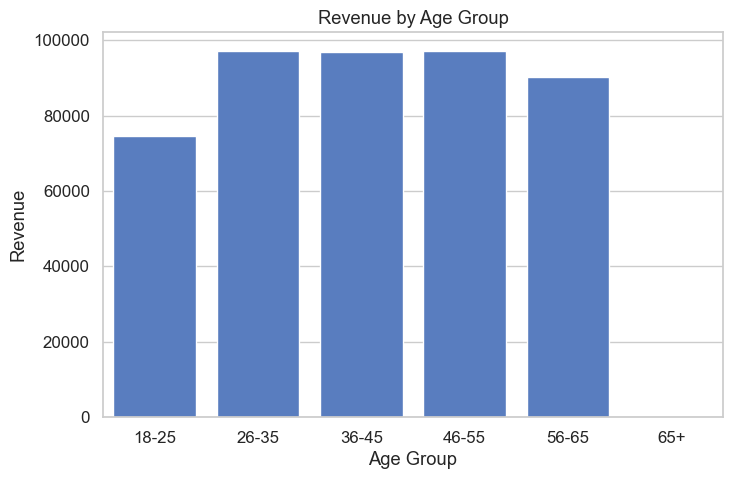

In [14]:

bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_sales = df.groupby('Age_Group')['Total_Amount'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=age_group_sales, x='Age_Group', y='Total_Amount')
plt.title("Revenue by Age Group")
plt.ylabel("Revenue")
plt.xlabel("Age Group")
plt.show()



**Insight:**  
Identifying high-spending age groups can help target promotions and tailor product offerings.



## 5. Revenue by Gender

We compare total revenue contributions by gender.


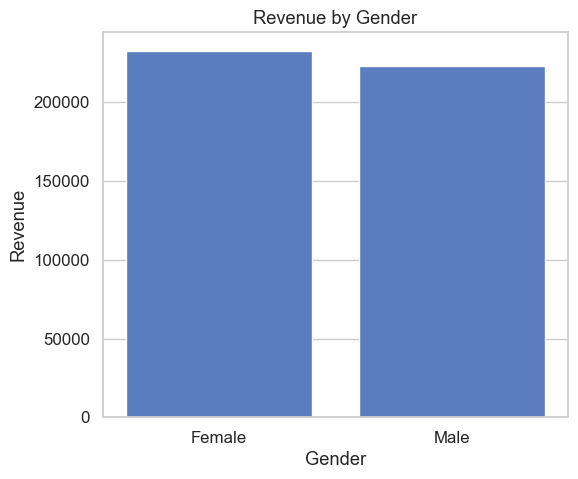

In [15]:

gender_sales = df.groupby('Gender')['Total_Amount'].sum().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(data=gender_sales, x='Gender', y='Total_Amount')
plt.title("Revenue by Gender")
plt.ylabel("Revenue")
plt.xlabel("Gender")
plt.show()



**Insight:**  
Gender-based insights can inform targeted campaigns and personalized shopping experiences.



# Conclusion
This analysis provided insights into:
- The highest-grossing product categories
- Seasonal sales trends
- Demographic spending patterns
- Customer spending behavior

These findings can guide marketing strategies, inventory management, and long-term business planning.
